In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/data_latinoamerica.csv")

In [4]:
df = df[df['location_key'] == 'BR']

In [5]:
df

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
550005,BR,2020-01-01,BR,Brazil,380.0,0.0,380.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550006,BR,2020-01-02,BR,Brazil,906.0,0.0,1286.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550007,BR,2020-01-03,BR,Brazil,478.0,0.0,1764.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550008,BR,2020-01-04,BR,Brazil,1848.0,0.0,3612.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550009,BR,2020-01-05,BR,Brazil,1095.0,0.0,4707.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550991,BR,2022-09-13,BR,Brazil,10420.0,104.0,34544377.0,685002.0,347811286.0,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,23313.0,33675124.0
550992,BR,2022-09-14,BR,Brazil,14525.0,119.0,34558902.0,685121.0,347868481.0,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,21500.0,33696624.0
550993,BR,2022-09-15,BR,Brazil,9931.0,82.0,34568833.0,685203.0,347868481.0,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,9607.0,33706231.0
550994,BR,2022-09-16,BR,Brazil,NaN,NaN,NaN,NaN,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,NaN,NaN


### Contar cuantos valores Nulos tiene cada columna

In [6]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              2
new_deceased                               2
cumulative_confirmed                       2
cumulative_deceased                        2
cumulative_vaccine_doses_administered    384
average_temperature_celsius                7
minimum_temperature_celsius                6
maximum_temperature_celsius                6
rainfall_mm                               10
relative_humidity                          7
new_recovered                              3
cumulative_recovered                       3
dtype: int64


### Contar cuantos 0 tiene cada columna

In [7]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 7 rows with zero values.
Column 'new_deceased' has 76 rows with zero values.
Column 'cumulative_confirmed' has 1 rows with zero values.
Column 'cumulative_deceased' has 76 rows with zero values.
Column 'rainfall_mm' has 979 rows with zero values.
Column 'new_recovered' has 59 rows with zero values.
Column 'cumulative_recovered' has 59 rows with zero values.

Counts of zero values per column: {'new_confirmed': 7, 'new_deceased': 76, 'cumulative_confirmed': 1, 'cumulative_deceased': 76, 'rainfall_mm': 979, 'new_recovered': 59, 'cumulative_recovered': 59}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [8]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_br= df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [9]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_br = df_br.copy()
df_br.drop(columns=columns_to_drop, inplace=True)

In [10]:
df_br.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550005,BR,2020-01-01,BR,Brazil,380.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,26.740741,75.765988,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550006,BR,2020-01-02,BR,Brazil,906.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,26.379630,77.359711,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550007,BR,2020-01-03,BR,Brazil,478.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,25.777778,82.525872,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550008,BR,2020-01-04,BR,Brazil,1848.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,24.962963,85.844670,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550009,BR,2020-01-05,BR,Brazil,1095.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,25.907407,81.640759,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6


In [11]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_br.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    382
average_temperature_celsius                3
relative_humidity                          3
dtype: int64


In [12]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_br.columns[(df_br == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_br[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 7 rows with zero values.
Column 'new_deceased' has 76 rows with zero values.

Counts of zero values per column: {'new_confirmed': 7, 'new_deceased': 76}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [13]:
# Imputación con la media para columnas específicas

df_br.loc[:, 'average_temperature_celsius'] = df_br['average_temperature_celsius'].fillna(df_br['average_temperature_celsius'].mean())
df_br.loc[:, 'relative_humidity'] = df_br['relative_humidity'].fillna(df_br['relative_humidity'].mean())


In [14]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_br.loc[df['date'] < fecha_limite] = df_br.loc[df['date'] < fecha_limite].fillna(0)

In [15]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 7 rows with zero values.
Column 'new_deceased' has 76 rows with zero values.
Column 'cumulative_confirmed' has 1 rows with zero values.
Column 'cumulative_deceased' has 76 rows with zero values.
Column 'rainfall_mm' has 979 rows with zero values.
Column 'new_recovered' has 59 rows with zero values.
Column 'cumulative_recovered' has 59 rows with zero values.

Counts of zero values per column: {'new_confirmed': 7, 'new_deceased': 76, 'cumulative_confirmed': 1, 'cumulative_deceased': 76, 'rainfall_mm': 979, 'new_recovered': 59, 'cumulative_recovered': 59}


In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_br.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,955.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,35361.61,702.22,133337957.08,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,27.93,58.01,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
std,35218.26,752.05,144463706.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.72,17.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,-573.00,0.00,0.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,17.44,14.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
25%,11311.50,160.25,0.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,26.30,43.80,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
50%,27030.50,466.00,55590694.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,27.55,58.54,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
75%,50016.50,1034.75,300935172.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,29.33,72.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
max,298408.00,4249.00,347356987.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,39.14,93.07,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [17]:
df_br[df_br['new_confirmed']<0]

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550634,BR,2021-09-21,BR,Brazil,-573.00,485.00,221952593.00,212559409.00,104435783.00,108123626.00,...,39.14,18.81,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [18]:
df_br[(df_br['date']>"2021-09-15")&(df_br['date']<"2021-09-25")]

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550629,BR,2021-09-16,BR,Brazil,34407.00,643.00,215430179.00,212559409.00,104435783.00,108123626.00,...,35.78,30.29,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550630,BR,2021-09-17,BR,Brazil,11202.00,333.00,217702730.00,212559409.00,104435783.00,108123626.00,...,36.06,33.28,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550631,BR,2021-09-18,BR,Brazil,150106.00,935.00,218718325.00,212559409.00,104435783.00,108123626.00,...,34.00,22.23,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550632,BR,2021-09-19,BR,Brazil,9458.00,244.00,219114311.00,212559409.00,104435783.00,108123626.00,...,36.61,26.65,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550633,BR,2021-09-20,BR,Brazil,7884.00,203.00,220225160.00,212559409.00,104435783.00,108123626.00,...,37.53,14.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550634,BR,2021-09-21,BR,Brazil,-573.00,485.00,221952593.00,212559409.00,104435783.00,108123626.00,...,39.14,18.81,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550635,BR,2021-09-22,BR,Brazil,36473.00,876.00,223606109.00,212559409.00,104435783.00,108123626.00,...,38.03,20.76,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550636,BR,2021-09-23,BR,Brazil,24611.00,648.00,225351989.00,212559409.00,104435783.00,108123626.00,...,27.93,58.01,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550637,BR,2021-09-24,BR,Brazil,19438.00,699.00,227078784.00,212559409.00,104435783.00,108123626.00,...,34.42,35.84,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [19]:
#calcular columna vacunas administradas por dia
g=df_br.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_br['vaccine_doses_administered_for_day']=h

df_br.vaccine_doses_administered_for_day.max()

2956866.0

In [20]:
df_br.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

In [21]:
# Crear la columna del acumulado de vacunas diarias
df_br['cumulative_vaccine_doses_administered'] = df_br['vaccine_doses_administered_for_day'].cumsum()

col = list(df_br.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_br = df_br[col]
df_br

,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
550005,BR,2020-01-01,BR,Brazil,380.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,75.77,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550006,BR,2020-01-02,BR,Brazil,906.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,77.36,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550007,BR,2020-01-03,BR,Brazil,478.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,82.53,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550008,BR,2020-01-04,BR,Brazil,1848.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,85.84,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550009,BR,2020-01-05,BR,Brazil,1095.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,81.64,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550974,BR,2022-08-27,BR,Brazil,12386.00,75.00,212559409.00,347014872.00,104435783.00,108123626.00,...,30.86,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,21188.00
550975,BR,2022-08-28,BR,Brazil,3452.00,22.00,212559409.00,347015427.00,104435783.00,108123626.00,...,29.76,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,555.00
550976,BR,2022-08-29,BR,Brazil,12458.00,128.00,212559409.00,347236256.00,104435783.00,108123626.00,...,26.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,220829.00
550977,BR,2022-08-30,BR,Brazil,16806.00,229.00,212559409.00,347269056.00,104435783.00,108123626.00,...,31.93,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,32800.00


In [22]:
col = list(df_br.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_br = df_br[col]
df_br

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550005,BR,2020-01-01,BR,Brazil,380.00,0.00,0.00,212559409.00,0.00,104435783.00,...,26.74,75.77,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550006,BR,2020-01-02,BR,Brazil,906.00,0.00,0.00,212559409.00,0.00,104435783.00,...,26.38,77.36,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550007,BR,2020-01-03,BR,Brazil,478.00,0.00,0.00,212559409.00,0.00,104435783.00,...,25.78,82.53,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550008,BR,2020-01-04,BR,Brazil,1848.00,0.00,0.00,212559409.00,0.00,104435783.00,...,24.96,85.84,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550009,BR,2020-01-05,BR,Brazil,1095.00,0.00,0.00,212559409.00,0.00,104435783.00,...,25.91,81.64,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550974,BR,2022-08-27,BR,Brazil,12386.00,75.00,21188.00,212559409.00,347014872.00,104435783.00,...,29.22,30.86,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550975,BR,2022-08-28,BR,Brazil,3452.00,22.00,555.00,212559409.00,347015427.00,104435783.00,...,29.71,29.76,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550976,BR,2022-08-29,BR,Brazil,12458.00,128.00,220829.00,212559409.00,347236256.00,104435783.00,...,30.80,26.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550977,BR,2022-08-30,BR,Brazil,16806.00,229.00,32800.00,212559409.00,347269056.00,104435783.00,...,29.61,31.93,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [23]:
df_br.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,954.00,974.00,954.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,35361.61,702.22,364105.36,212559409.00,133477432.68,104435783.00,108123626.00,25.43,0.75,29076910.00,...,27.93,58.01,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
std,35218.26,752.05,547522.99,0.00,144474698.32,0.00,0.00,0.00,0.00,0.00,...,2.72,17.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,-573.00,0.00,-189667.00,212559409.00,0.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,17.44,14.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
25%,11311.50,160.25,0.00,212559409.00,0.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,26.30,43.80,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
50%,27030.50,466.00,83733.50,212559409.00,56101046.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,27.55,58.54,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
75%,50016.50,1034.75,483692.50,212559409.00,300974974.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,29.33,72.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
max,298408.00,4249.00,2956866.00,212559409.00,347356517.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,39.14,93.07,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [24]:
# Calcular media y desvio estandar
media = df_br['vaccine_doses_administered_for_day'].mean()
desvio_estandar = df_br['vaccine_doses_administered_for_day'].std()

# Definir los límites para considerar outliers
lower_bound = media - 3 * desvio_estandar
upper_bound = media + 3 * desvio_estandar

# Verificar si lower_bound es menor a 0
if lower_bound < 0:
    lower_bound = 0

# Filtrar el DataFrame para ver los outliers
df_br[(df_br['vaccine_doses_administered_for_day'] < lower_bound) | (df_br['vaccine_doses_administered_for_day'] > upper_bound)]


,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550538,BR,2021-06-17,BR,Brazil,74042.00,2311.00,2295890.00,212559409.00,86518342.00,104435783.00,...,27.11,45.02,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550586,BR,2021-08-04,BR,Brazil,40716.00,1175.00,2419520.00,212559409.00,145262230.00,104435783.00,...,28.50,31.09,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550592,BR,2021-08-10,BR,Brazil,34885.00,1211.00,2274597.00,212559409.00,153592799.00,104435783.00,...,30.78,33.87,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550593,BR,2021-08-11,BR,Brazil,32443.00,975.00,2026259.00,212559409.00,155619058.00,104435783.00,...,32.00,34.70,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550594,BR,2021-08-12,BR,Brazil,39982.00,1148.00,2217494.00,212559409.00,157836552.00,104435783.00,...,31.56,26.58,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550595,BR,2021-08-13,BR,Brazil,33933.00,966.00,2142094.00,212559409.00,159978646.00,104435783.00,...,32.83,24.72,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550598,BR,2021-08-16,BR,Brazil,14471.00,434.00,2085116.00,212559409.00,163875689.00,104435783.00,...,31.61,33.25,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550599,BR,2021-08-17,BR,Brazil,37613.00,1106.00,2956866.00,212559409.00,166832555.00,104435783.00,...,32.44,33.72,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550601,BR,2021-08-19,BR,Brazil,36315.00,979.00,2449796.00,212559409.00,171196832.00,104435783.00,...,33.06,23.26,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550606,BR,2021-08-24,BR,Brazil,30872.00,894.00,2402742.00,212559409.00,178961022.00,104435783.00,...,33.06,25.72,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [25]:
# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_br[(df_br['vaccine_doses_administered_for_day'] >= lower_bound) & (df_br['vaccine_doses_administered_for_day'] <= upper_bound)]

In [26]:
df_filtered.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,...,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00
mean,35199.10,693.94,327376.07,212559409.00,132452008.84,104435783.00,108123626.00,25.43,0.75,29076910.00,...,27.85,58.18,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
std,35690.75,762.06,480337.86,0.00,145625400.71,0.00,0.00,0.00,0.00,0.00,...,2.68,16.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,-573.00,0.00,0.00,212559409.00,0.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,17.44,14.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
25%,10692.00,147.00,0.00,212559409.00,0.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,26.26,44.24,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
50%,26502.00,433.00,74927.00,212559409.00,48227625.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,27.48,58.70,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
75%,49762.50,999.00,454307.50,212559409.00,301855545.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,29.22,72.54,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
max,298408.00,4249.00,1992573.00,212559409.00,347356517.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,39.14,93.07,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


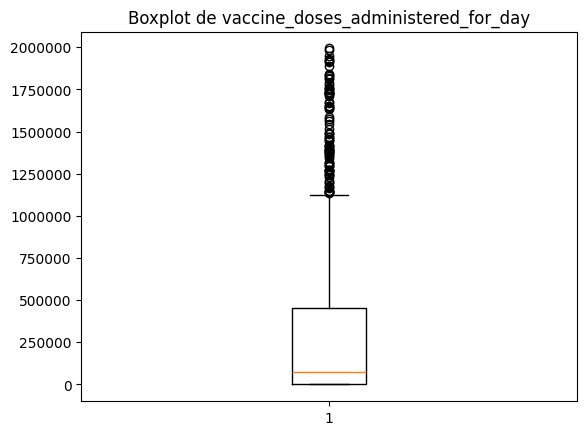

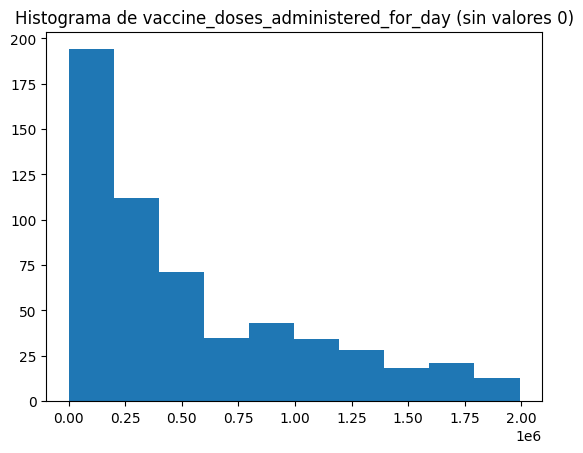

In [27]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Filtrar los datos para excluir los valores 0
df_filtered_non_zero = df_filtered[df_filtered['vaccine_doses_administered_for_day'] > 0]

# Histograma con matplotlib
plt.hist(df_filtered_non_zero['vaccine_doses_administered_for_day'], bins=10)  # el número de bins se puede ajustar a preferencia
plt.title('Histograma de vaccine_doses_administered_for_day (sin valores 0)')
plt.show()

In [28]:
avg_vaccine = round(df_br['vaccine_doses_administered_for_day'].mean(), 0)

df_prueba = df_br.copy()  # Crear una copia del DataFrame original

# Reemplazar los valores por encima del valor máximo o por debajo del valor mínimo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound or x < lower_bound else x
)

# Calcular la media de la columna 'new_confirmed' excluyendo los valores negativos
media_new_confirmed = round(df_br['new_confirmed'].mean(), 0)

# Reemplazar los valores negativos con la media calculada
df_prueba['new_confirmed'] = df_prueba['new_confirmed'].apply(
    lambda x: media_new_confirmed if x < 0 else x
)


In [29]:
df_prueba.to_csv('data\processed\covid19_Brasil.csv', index=False)


In [30]:
df_prueba.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,954.00,974.00,954.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,35398.50,702.22,328107.57,212559409.00,133477432.68,104435783.00,108123626.00,25.43,0.75,29076910.00,...,27.93,58.01,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
std,35199.40,752.05,475553.21,0.00,144474698.32,0.00,0.00,0.00,0.00,0.00,...,2.72,17.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,212559409.00,0.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,17.44,14.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
25%,11392.00,160.25,0.00,212559409.00,0.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,26.30,43.80,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
50%,27097.50,466.00,84841.50,212559409.00,56101046.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,27.55,58.54,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
75%,50016.50,1034.75,445907.00,212559409.00,300974974.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,29.33,72.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
max,298408.00,4249.00,1992573.00,212559409.00,347356517.00,104435783.00,108123626.00,25.43,0.75,29076910.00,...,39.14,93.07,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
